# Week 9 : Lecture A 
 ## Functional: Comprehensions, closures and lambda
 ##### CS1P - University of Glasgow - John H. Williamson - 2017/2018 - Python 3.x

# Functional approaches
## Spreadsheets
The way in which most people (i.e. not programmers) deal with "complex" computations on data
<img src="imgs/spreadsheet.png">
Spreadsheets are **functional**; you write expressions in terms of the values of other cells, and the result of evaluating those expressions populate the result cells.

Every cell is a direct mapping of the value of other cells on the spreadsheet. Expression cells update as the sheet changes; there is no **hidden** data in the background.

## Functional programming
Functional programming does not mean using functions in programming :) Rather, it restricts programming to operations which work as mathematical functions do: i.e. a map from one set to another:

$$ y = f(x)$$

A *pure* functional program is simply lots of such functions joined together

$$ o = f(g(h(x_1), k(h(x_2)), i(x_3)) $$

the $x_i$ are inputs, and unlike "high school" functions they don't have to act on numbers, but can act on any type at all, and they can have any number of arguments.

### Why bother? 
This seems much less flexible than using for loops and writing things into dictionaries and all the usual things we expect to do when programming. So why restrict ourselves to this very limited form of programs? Is this even enough to do anything useful?

### Side effects and mutability
We have seen throughout the course the complexity that can arise when we have **mutable** data structures. We have can get into serious trouble when we have multiple references to a single mutable data structure and can cause "spooky action at a distance" -- a change somewhere in the code can cause side-effects in some completely different and apparently unconnected part.

And ordinary variables are essentially a big, mutable dictionary which is already in the "background" (this is almost exactly how Python variables are actually implemented). 

In [ ]:
# the currently bound local variables
x = 20
test = "string"
# locals() returns us the local variables as a dictionary
print(locals()["x"])
print(locals()["test"])

# we can write to it as well...
# this is the same as writing 
# test = "side-effect"
locals()["test"] = "side-effect"
print(test)

**This implies that the problems of mutability extend to just using ordinary variables!**

## Immutable data structures
A purely functional language **only** has immutable data structures. Everything is fixed when it is created and nothing can be modified. Languages like Clojure, ML and Haskell have data structures of this type.

*This is just a powerful as any other form of computation.*

However, it can be an interesting challenge to formulate problems in this structure, and there can be performance issues: for example, appending an element to a list **must** involve copying the original list.

But in this world, all of the problems with multiple variables refering to the same value go away; we never have *aliasing* issues like this:


In [ ]:
a = [1,2,3]
b = a
del a[1]
print(b) # b got changed!

## Flow model of computation
Because this lets us be sure that each step of a program can be independent of the next, we can reason about the code as a **flow of data through a graph**. One node process data (a function) and passes it to the next.

The heavy lifting tools in deep learning (Theano, TensorFlow, Caffe), complex visual editing tools (like the node editors of Blender etc.) and the backbones of big data processing (Hadoop, Spark, MapReduce) etc. work in this way. 

By transforming the program into a data flow graph, the nodes can be split up across cores, processors, servers, in a cluster or in the cloud. The art of "big data" is really being able to write code as functional graphs.

<img src="imgs/blendernodes.png">


### Why?
#### Non-functional
<img src="imgs/bad_wiring.jpg">
#### Functional
<img src="imgs/good_wiring.jpg" width="400px">

### Functional programming is arguable a more elegant approach to programming

## Faster: Optimization
The simple form of functional programs, and the certainty with which **dependencies** can be traced makes it possible to implement sophisticated automatic optimisations.

    f(g(x), h(g(x), g(x))
    
    -> y=g(x), f(y, h(y,y))
    
This kind of transform is only guaranteed to be correct if we can be absolutely sure that `g(x)` has no side effects.

### Functional: no side affects, result is good

In [ ]:
def f(x, y):
    return [x]+y

def g(x):
    return x**2

def h(x,y):
    return [y-1, x+1]

x = 3
print(f(g(x), h(g(x), g(x))))

In [ ]:
# this is fine
y = g(x)
print(f(y, h(y, y)))

### Non-functional: side effect, result is wrong

In [ ]:
def f(x, y):
    return [x]+y

def g(x):
    global t
    t += x
    return t**2

def h(x,y):
    return [y-1,x+1]

t = 0
x = 3
print(f(g(x), h(g(x), g(x))))

In [ ]:
# this is not fine; this does something different than the line above
t = 0
y = g(x)
print(f(y, h(y, y)))

An optimising compiler for  functional code can make **much** stronger assumptions about the interlinking of code. This allows aggressive optimisations -- which might completely reorganise the flow of execution -- to be made safely.


##  Better: GPUs and parallelisation
Because there are no side effects, a functional program can often be cleanly broken up into guaranteed non-intefering segments. **These can be run in parallel**. 

GPUs, for example, are by far the most computationally powerful part of any modern computer system. But their power is acheived through thousands of cores which all compute at the same time. Data from one core can never depend upon another (otherwise cores would have to wait for each other). In other words, each core must compute some independent **function** of a fixed input.

<img src="imgs/shader_demo.png">
*[Image credit: https://www.shadertoy.com/view/llK3Dy]*

GPU programming is essentially functional programming. For example, to write an image effect as a shader, you have to write a function that will be applied to each pixel independently. It can have no side effects which might change the state of other pixels.

Likewise, processing huge databases requires massive **concurrency**. Concurrency is very (very!) hard to get correct unless programs can be broken up into sections which have *no* interdependcies; i.e. no side-effects.


## Stronger: Correctness
If we know that there can **never** be side-effects, it is much easier to reason about correctness. In fact, for certain kind of operations, it is possible to **prove** (in the mathematical sense) that an implementation will do the right thing.

<img src="imgs/rocket.jpg">
*[Image credit: NASA, public domain]*

If you are building rocket controllers or pacemakers or train signals, a guarantee of correctness may be worth more than a simple or flexible implementation.

# Functional Python
Python is not a functional language, but many functional constructs can be used. The **discipline** of functional programming is a potent mindset in approaching problems. It may not be convenient or practical to use a purely functional approach, but taking a functional approach for at least some of the implementation can make coding much cleaner and more robust.

The key thing to remember is that we work by transforming data in "passes"; each pass is a function, and our whole program is just a sequence of functions.

## Elegant functional programming
Python (along with Haskell and some other modern languages) has a very elegant way of implementing functional transformations. These are called **comprehensions** and they allow us to specify a transformation from one compound data type to another in terms of operations on each element.

Comprehensions are functional; they represent a "straight through" transformation and can have no side-effects whatsoever. Comprehensions cannot make in-place changes to the data types they are working on.


**Most importantly, comprehensions are short and easy to read. They precisely and cleanly represent lots of things we might want to do.**. They are also very efficient (because of the strong assumptions Python can make about what they are going to do), often much faster than explicit loops. 


In [ ]:
# consider this definition: it transforms a list by 
# doubling each element

def double(l):
    new_l =[]
    for x in l:
        new_l.append(x*2)
    return new_l

print(double([1,2,3,4]))

### Comprehensions
In maths, we would write this transformation as:
$$\{2 x\  |\  x \in \{1,2,3,4\}\}$$
(the set of values defined by `2*x` for each `x` in the set `{1,2,3,4}`). This is called set builder notation.

We can write the same equivalent code almost directly in Python. The syntax is

    [expression for var in seq]

Comprehensions allows us to use a variant of this notation to quickly write **transformations** of lists, where we apply an operation to every element of a list. This operation is sometimes called **map** (because it maps each value in a list to another value).
For example:
  

In [2]:
nums = [1,2,3,4]

# double nums 
print([(i*2) for i in nums])

[2, 4, 6, 8]


$$\{(x,x)\  |\  x \in \{1,2,3,4\}\}$$

In [3]:
# repeat each element twice
print([[i,i] for i in nums])

[[1, 1], [2, 2], [3, 3], [4, 4]]


In [22]:
def scale_by(nums, n):
    return [i*n for i in nums]

scale_by([1,2,3,4],5)

[5, 10, 15, 20]

We have a for loop, with an loop variable, and a sequence we are iterating over. We just put the whole expression inside square brackets: this means "do all these operations" and collect the results back into a list.

**This is called a list comprehension.**

Many operations can be written as comprehensions: for example taking a list of points and finding the list of x-coordinates and the list of y-coordinates:

In [23]:
# select the first or seconds element of a list of pairs
pairs = [(0,1), (2,2), (-1, 6), (7,8)]
print(pairs)
print([[pair[0] for pair in pairs], [pair[1] for pair in pairs]])

[(0, 1), (2, 2), (-1, 6), (7, 8)]
[[0, 2, -1, 7], [1, 2, 6, 8]]


### When to use a comprehension
If you have code which looks like:

    l = []
    for elt in some_list:
        <some operations on elt>
        l.append(result)
        
you can often write it *much* more clearly as a comprehension.

In [25]:
%%timeit
## and it is faster
[i*2 for i in range(200000)]

100 loops, best of 3: 13.8 ms per loop


In [26]:
%%timeit
# slower
l = []
for i in range(200000):        
    l.append(i*2)

10 loops, best of 3: 23.7 ms per loop


### Nested comprehensions: multiple `for` statements
Just as we can nest `for` loops, we can have multiple for statements in a comprehension. However, except in very simple cases, it's usually a bad idea to have multiple for statements in a comprehension, because the logic gets hard to follow.

In [7]:
## we can have multiple fors
nums = [0,1,2,3,4]
print([(i,j,i*j) for i in nums for j in range(i)])

## This is the same as
l = []
for i in nums:
    for j in range(i):        
            l.append((i,j,i*j))
print(l)

[(1, 0, 0), (2, 0, 0), (2, 1, 2), (3, 0, 0), (3, 1, 3), (3, 2, 6), (4, 0, 0), (4, 1, 4), (4, 2, 8), (4, 3, 12)]
[(1, 0, 0), (2, 0, 0), (2, 1, 2), (3, 0, 0), (3, 1, 3), (3, 2, 6), (4, 0, 0), (4, 1, 4), (4, 2, 8), (4, 3, 12)]


## Filtering: if tests
As well as **mapping** an operation onto elements of a sequence,
we can also **filter** elements. This allows us to conditionally remove elements which fail some test.

Again, in mathematical notation we might write:

$$\{2 x\  |\  x \in \mathbb{Z}, 0 < x < 10 \land x\  \text{odd}\}$$
The condition on the end here $$0 < x < 10 \land x\  \text{odd}$$ is a filter; it only "lets through" odd integers in the range [0,10). 

Between **map** and **filter** we have a very powerful set of primitives.

In [3]:
colors = ["yellow", "red", "blue", "orange", "violet",
          "indigo", "green"]

# remove colors which have "u" in them -- i.e. keep those without "u"
print([c for c in colors if "u" not in c])

['yellow', 'red', 'orange', 'violet', 'indigo', 'green']


In [30]:
# print twice every odd number
print([x*2 for x in range(20) if x%2!=0])

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38]


In [31]:
# note that we can combine multiple for and if tests
# print the uppercase version of all the vowels 
# from all the colors that don't have any "u"s in them
print([char.upper() for c in colors for char in c 
       if "u" not in c if char in 'aeiou'])

['E', 'O', 'E', 'O', 'A', 'E', 'I', 'O', 'E', 'I', 'I', 'O', 'E', 'E']


We can even (very inefficiently) compute prime numbers:

In [32]:
# n**0.5+1 means up until the (square root of n) + 1
print([n for n in range(2, 500) if 
     all([n % d != 0 for d in range(2, int(n**0.5+1))])])

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499]


### Dictionary comprehensions
We can generate dictionaries in exactly the same way. However, we must provide both a key and  value for each element in the `for` loop.

We use curly brackets, and the first element must be of the form `<key>:<value>`. The key and the value can be any expression, though the key must evaluate to an immutable, hashable value.


In [4]:
# map first letter of a color to the full name
abbrev_colors = {color[0]:color for color in colors}
print(abbrev_colors)
print(abbrev_colors['i'])
print(abbrev_colors['r'])

{'y': 'yellow', 'r': 'red', 'b': 'blue', 'o': 'orange', 'v': 'violet', 'i': 'indigo', 'g': 'green'}
indigo
red


In [5]:
print(abbrev_colors)

{'y': 'yellow', 'r': 'red', 'b': 'blue', 'o': 'orange', 'v': 'violet', 'i': 'indigo', 'g': 'green'}


In [6]:
# switch the keys and values of a dictionary
inverted = {v:k for k,v in abbrev_colors.items()}
print(abbrev_colors)
print(inverted)

{'y': 'yellow', 'r': 'red', 'b': 'blue', 'o': 'orange', 'v': 'violet', 'i': 'indigo', 'g': 'green'}
{'yellow': 'y', 'red': 'r', 'blue': 'b', 'orange': 'o', 'violet': 'v', 'indigo': 'i', 'green': 'g'}


## What can't you do in a comprehension?
Comprehensions are powerful, but they are more limited than the full features of Python code. The restrictions that are made allow comprehensions to be fast and have a very simple syntax.

*In a comprehension, there can be:*
* No indefinite iteration (no `while` style loops, only `for`)
* No `break` or `continue` or `return` (no "unplanned" exits)
* No assignment to variables
* No non-expression statements (no `del` for example)
* Exactly one output -- we will always get one list or one dictionary back.

A comprehension makes a guarantee that the loop will run a *fixed number of times* (which can be determined in advance of the comprehension running), and that *no variables* will change during the execution **except** for the loop variables themselves. 

#### Comprehensions are functional.

They process a sequence of data without any side effects. The expression at the start defines the operation to be applied to each element of a sequence.

------

## First-class functions and closures
### Passing functions around
Python has first-class functions. They can:
* be put into variables
* stored in compound data structures
* passed to other functions
* be returned from other functions

We saw that passing functions around makes *event-based programming* easy to implement, and we can use that to set callbacks. 

Putting functions into compound data structures like dictionaries is a very nice way of mapping from "commands" to the code which executes those commands, as in the lab exercise with the text adventure game.

The last of these, **returning** from other functions has some very useful applications.

### Attaching data to functions: closures

We can have **local** variables and **global variables**. But global variables are visible to everything; they are completely public. Local variables are "safer" because they can only be seen by that specific function. 

*But* their values don't persist from call to call. They get reset every time the function is called, and we get a new blank local scope. **Closures** let us have a private set of variables for one function, which do stick around from call to call.

All we need to do refer to variables which are created in an **outer scope**, and that function will then carry about the variables it referred to in the outer scope. A simple example:

In [10]:
def make_multiplier(n):
    def multiply(x):
        # note that the n here refers to the n
        # set *when make_multiplier was called*
        # n is "remembered"
        return x * n
    # we return the *function* we just defined
    return multiply

doubler = make_multiplier(2)
print("4*2", doubler(4))

tripler = make_multiplier(3)
print("4*3", tripler(4))

print("4*2", doubler(4))

print("2*2*3", doubler(tripler(2)))

4*2 8
4*3 12
4*2 8
2*2*3 12


What happened here?
* The value of `n` is **bound** each time `make_multiplier()` is called;
* the definition of multiply, which is *inside* `make_multiplier()` then captures that binding ("closes over" it),
* and then this version of multiply with this binding is returned.

Note that we have created a **new, different** version of `multiply()` each time we call `make_multiplier()`. It has manufactured a new function for us.

Now we can write functions that do **partial application**; that is they bind *some* of their parameters at one time, and bind the remainder later. 

In [11]:
def part_a(a):
    def part_b(b):
        def part_c(c):
            return "%s said '%s' %s" % (a,b,c)
        return part_c
    return part_b

a = part_a
a = a("The Giant")
a = a("The things I tell you will not be wrong.")
a = a("very slowly.")
print(a)

The Giant said 'The things I tell you will not be wrong.' very slowly.


If we want to write to a variable in an outer scope, we must specify that we are going to do so, in the same way that we had mark `global` variables that we wanted to be writable from within a function.

The syntax to do this is `nonlocal`, which marks a variable as being a writable (mutable) variable from an outer scope.


In [14]:
def make_counter():
    # note that ctr gets a new value every time
    # that make_counter() is called
    ctr = 0
    def inc():
        # we have to specify that we want to be able 
        # to access ctr for writing
        nonlocal ctr
        ctr += 1
        return ctr
    return inc

# make two *separate* counters
ctr1 = make_counter()
ctr2 = make_counter()
# show that they are in fact separate
print("ctr1()", ctr1())
print("ctr1()",ctr1())
print("ctr1()",ctr1())
print()
print("ctr2()",ctr2())
print("ctr2()",ctr2())
print()
print("ctr1()",ctr1())
print("ctr1()",ctr1())

ctr1() 1
ctr1() 2
ctr1() 3

ctr2() 1
ctr2() 2

ctr1() 4
ctr1() 5


### Attaching data to functions
Now we can attach data to functions. For example, consider the sorting list-of-lists problem:


In [15]:
shopping = [[1, "mutton", 2.99], [2, "cheese", 3.50], [4, "soap", 1.25],
            [5, "gravel", 24.99]]

In [16]:
def make_key(k):
    def key(l):
        return l[k]
    return key

# now we have a "factory" that makes
# new functions with one of the parameters already bound
k1 = make_key(0)
k2 = make_key(1)
k3 = make_key(2)

# we can pass this as the key
print(sorted(shopping, key=k1))
print(sorted(shopping, key=k2))
print(sorted(shopping, key=k3))

[[1, 'mutton', 2.99], [2, 'cheese', 3.5], [4, 'soap', 1.25], [5, 'gravel', 24.99]]
[[2, 'cheese', 3.5], [5, 'gravel', 24.99], [1, 'mutton', 2.99], [4, 'soap', 1.25]]
[[4, 'soap', 1.25], [1, 'mutton', 2.99], [2, 'cheese', 3.5], [5, 'gravel', 24.99]]


## Higher-order functions: reduce, map and filter
A **higher-order** function is just a function that operates on functions.

There are three "standard" higher-order functions:

* **map** which applies a function to each element of a sequence, like `[2*x for x in l]`
* **filter** which selects element where a test is True, like `[x if x%2==0]`
* **apply** which applies a function to a *sequence* of arguments, like fn(*args)

* **reduce** `reduce(fn, seq)` which applies fn to the first two elements of seq, then applies fn to that result and the next element of seq, and so on.


Of these we haven't seen **reduce** or **apply** yet.

In [2]:
from functools import reduce


def mul(x, y):
    return x * y



## reduce
`reduce` applies **only** to two argument functions, like `mul(x,y)`. 

Reduce:
* takes the first two elements of a sequence and applies the function
* then it takes that result, and applies the function to the result and the next element of the sequence
* then it takes *that* result, and applies the function to the result and the next element of the sequence


So below, `reduce` does the following:
    
    mul(1, 2)   -> 2
    mul(2, 3)   -> 6
    mul(6, 4)   -> 24
    mul(24, 5)  -> 120
    -> 120
    
or you could see it as doing

    mul(1, mul(2, mul(3, mul(4, 5)))))
    

In [6]:
print(reduce(mul, [1, 2, 3, 4, 5]))

120


In [7]:
def concat(x,y):
    return x+"-"+y

# we can implement join like functionality using reduce
print(reduce(concat, ["one", "two", "three", "four"]))

one-two-three-four


In [8]:
# this is how reduce is implemented
def myreduce(fn, args):
    if len(args)>2:        
        result = args[0] 
        for arg in args[1:]:
            result = fn(result, arg)
        return result
    return None

In [9]:
print(myreduce(concat, ["one", "two", "three", "four"]))

one-two-three-four


## zip
There is one other very useful function when working functionally. `zip` takes a list of sequences, and returns a sequence of the tuples drawn from those sequences.

In other words, it *peels* one element at a time off multiple sequences, and returns a tuple of those elements.

It is very useful in combination with parallel assignment to iterate over several sequences at the same time.

For example, consider this:

In [42]:
x = [1,2,3,4]
y = ["a", "b", "c", "d"]

for i in range(len(x)):
    print(x[i], y[i])

1 a
2 b
3 c
4 d


`zip` lets you write this much more directly:

In [43]:
for xi, yi in zip(x,y):
    print(xi, yi)

1 a
2 b
3 c
4 d


In [45]:
# zip can take any number of sequences
for xi, yi, zi in zip(x,y,x[::-1]):
    print(xi, yi, zi)

1 a 4
2 b 3
3 c 2
4 d 1


In [46]:
print(x)
print(y)
print(list(zip(x,y)))

[1, 2, 3, 4]
['a', 'b', 'c', 'd']
[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]


# Lambda: anonymous functions
Python has what are (oddly) called **lambda expressions**. These are *just* anonymous functions, and nothing more.

Their only advantage is that they can be written in-line with an expression, instead of requiring a separate `def` block. This doesn't seem that important, but it is often really handy.

In [46]:
def add_def(a,b):
    return a + b

# this is *exactly* the same as above
# it creates the function, then stores it in a variable
# note that the parameters are given as a comma separated list after
# the lambda
add_lambda = lambda a,b: a+b

print(add_def(2,3))
print(add_lambda(2,3))

5
5


## lambda parameters
`lambda` is just a way of writing functions without giving them a name. It is used because it allows writing functions *within* an expression.

There still has to be a parameter list, which is given before a `:` The "body" of the `lambda` must be an expression.

In [49]:
def f(x,y):
    return x * y 

def g(x):
    return [x,x]

def h():
    return "LAMBDA"

# this is exactly equivalent to this:
f = lambda x, y: x * y    
g = lambda x: [x,x]
h = lambda: "LAMBDA"

The major use here is things like callbacks; if you have a bunch of buttons that need to do similar things, it can be annoying to have to write a whole bunch of `def`s.

In [48]:
## Button example
import ipywidgets as widgets
from IPython.display import display

In [49]:
def callback_1(s):
    print("Don't hit me")

def callback_2(s):
    print("It hurts!")

button_1 = widgets.Button(description='Hit me!')
button_1.on_click(callback_1)
button_2 = widgets.Button(description='Hit me too!')
button_2.on_click(callback_2)

display(widgets.HBox([button_1, button_2]))

Don't hit me
It hurts!


In [50]:
# annoying
def mprint(s):
    print(s)
    
responses = [("Hit me!", "Don't hit me"), 
             ("Hit me too!", "It hurts!"),
                ("Try hitting me.", "Ouch, you're right!")]

def make_button(description, msg):
    b = widgets.Button(description=description)
    # also annoying; why can't it be set when the button is created!
    b.on_click(lambda x:mprint(msg))
    return b
    
buttons = [make_button(desc, msg) for desc,msg in responses]    
display(widgets.HBox(buttons))

Don't hit me
It hurts!
Ouch, you're right!


Other uses, like in the list-of-list sorting problem, are really just shorthand:

In [51]:
print(sorted(shopping, key=lambda x:x[0]))
print(sorted(shopping, key=lambda x:x[1]))
print(sorted(shopping, key=lambda x:x[2]))

[[1, 'mutton', 2.99], [2, 'cheese', 3.5], [4, 'soap', 1.25], [5, 'gravel', 24.99]]
[[2, 'cheese', 3.5], [5, 'gravel', 24.99], [1, 'mutton', 2.99], [4, 'soap', 1.25]]
[[4, 'soap', 1.25], [1, 'mutton', 2.99], [2, 'cheese', 3.5], [5, 'gravel', 24.99]]


### Deferred execution
Sometimes `lambda` is used to defer or postpone execution. Imagine I wanted to print out a message based on a key. I want to use different functions based on the key, so I can't just store the output as a string and then `print` it.

I might try:

In [66]:
from IPython.display import display, HTML
messages = {"hi":print("hello"), "bye":display(HTML("<h1>Alright, get lost then!</h1>"))}

hello


In [67]:
messages["hi"]

This doesn't do what we want. It executes the `print` immediately, and there is no way to get the message from the dictionary later.

`lambda` can wrap it in a unction, so that the execution won't happen until later

In [68]:
messages = {"hi":lambda: print("hello"), 
            "bye":lambda: display(HTML("<h1>Alright, get lost then!</h1>"))}

In [69]:
messages["bye"]()   # must use parentheses to invoke the call

In [65]:
messages["bye"]()   # must use parentheses to invoke the call

## Recursive solutions
### Pure functional solutions
Why do functional approaches use recursion? Because we *cannot* modify variables; thus we could never maintain a counter (for loop) or change a condition (while loop). The *only* thing we can ever do to change the flow of execution is call another function. 

#### This is why functional languages emphasise recursion; true functional programming can only have recursion!

If that function is the same function we are currently in **but with different values bound to the parameters** then we have a way of doing repetition within a functional framework.

### Max
For example, we might need to find the maximum value of a list. But we can't use variables to keep track of the maximum, because that would require mutability.

Instead, we can write it like this:

In [70]:
x = [5, 20, 103, 5903, 1102, 24, 1, 63, 44, -1000, 2000000]


def rmax(x, max_found=None):
    # nothing left, use the max_found
    if len(x) == 0:
        return max_found

    # take off the first element, check the remainder of the list
    if x[0] > max_found:
        # bind max_found to x[0]
        return rmax(x[1:], x[0])
    else:
        # leave max_found unchanged
        return rmax(x[1:], max_found)


rmax(x, 10000000)

10000000

In [72]:
x = [5, 20, 103, 5903, 1102, 24, 1, 63, 44, -1000]


def rsum(x):
    if len(x) == 1:
        return x[0]
    return x[0] + rsum(x[1:])


rsum(x)

6265

### A tree
The **tree** is a structure for which recursive solutions are a very natural fit. It is easy to represent a tree using a list of lists; for example, a binary tree (one which has at most two branches at every stage) can be written as pairs, where each element of the pair can also be a pair:



In [74]:
tree = [[["a", "b"], ["c", ["d", "e"]]], ["h", "i"]]

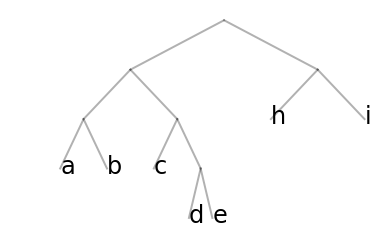

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt


def plot_tree(tree, px=0, py=0, w=1.0, h=0.1):
    if type(tree) == type([]):
        plot_tree(tree[0], px - w / 2, py - h, w / 2)
        plot_tree(tree[1], px + w / 2, py - h, w / 2)
        plt.plot([px, px + w / 2], [py, py - h], "k", alpha=0.3, lw=2)
        plt.plot([px, px - w / 2], [py, py - h], "k", alpha=0.3, lw=2)
    else:
        plt.text(px, py - 0.01, tree, fontsize=24, color="k")
    plt.axis("off")


plot_tree(tree)

In [76]:
def print_tree(t):
    if type(t)==type([]): 
        return  print_tree(t[0]) + print_tree(t[1])
    else:
        return t
    
print(print_tree(tree))

abcdehi


In [77]:
def member_tree(elt, t):
    if type(t)==type([]): 
        return  member_tree(elt, t[0]) or member_tree(elt, t[1])
    else:
        return elt==t
    
member_tree("a", tree)

True

## Finally 
Send me your feedback via YACRS, please.

## Week review
* A functional approach is side-effect free
* This means **no setting of variables**
* List comprehensions allow an expression to be applied to every element of a sequence
* If tests in comprehensions can filter out certain values
* Comprehensions can be nested
* List comprehensions cannot have side effects
* Dictionary comprehensions work in the same way, but must specify a key and a value
* Functions are first-class and can be passed around
* Higher-order functions are functions that operate on functions
* map, reduce, filter, apply and zip are very useful in functional approaches.
* map and filter are just comprehension operations (`for` and `if`)
* apply is just using `fn(*args)`
* lambda allows anonymous functions to be defined
* it is very useful in defining callbacks
* closures allow functions to carry around data
* nonlocal variables must be marked as such to write to them from within an inner scope
* Recursive solutions are the only way to repeat operations in a purely functional way
* Recursion is very useful for operations on tree-like structures

## Syntax review

In [ ]:
# There are also anonymous functions
(lambda x: x > 2)(3)   # => True
(lambda x, y: x ** 2 + y ** 2)(2, 1) # => 5


[x for x in [3, 4, 5, 6, 7] if x > 5]   # => [6, 7]

# We can use list comprehensions for nice maps and filters
[add_10(i) for i in [1, 2, 3]]  # => [11, 12, 13]
[x for x in [3, 4, 5, 6, 7] if x > 5]   # => [6, 7]

# You can construct set and dict comprehensions as well.
{x for x in 'abcddeef' if x in 'abc'}  # => {'d', 'e', 'f'}
{x: x**2 for x in range(5)}  # => {0: 0, 1: 1, 2: 4, 3: 9, 4: 16}